In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/all_x_text_per_speaker.csv')
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')

X_list = X.iloc[:, 0].tolist() # get just the col of strings

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_list)
total_words = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(X_list)
padded_sequences = pad_sequences(sequences)

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)

In [5]:
# print(x_train)
# print(x_train.info())
# print(x_train.iloc[:, 0].tolist())
# x_train_list = x_train.iloc[:, 0].tolist()

In [6]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(x_train_list)
# total_words = len(tokenizer.word_index) + 1

In [7]:
# print(total_words)

In [8]:
# sequences = tokenizer.texts_to_sequences(x_train_list)
# padded_sequences = pad_sequences(sequences)

In [9]:
# padded_sequences.shape[1]

In [10]:
# Build the model
# refine these params later lol uh....
embedding_dim = 16
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      LSTM(100),
      Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
17/17 [==============================] - 14s 503ms/step - loss: 0.6518 - accuracy: 0.7004 - val_loss: 0.5992 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 9s 555ms/step - loss: 0.5954 - accuracy: 0.7271 - val_loss: 0.5791 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 8s 444ms/step - loss: 0.5712 - accuracy: 0.7271 - val_loss: 0.5845 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 9s 519ms/step - loss: 0.5493 - accuracy: 0.7271 - val_loss: 0.5808 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 7s 443ms/step - loss: 0.4952 - accuracy: 0.7271 - val_loss: 0.5834 - val_accuracy: 0.7314
Epoch 6/10
17/17 [==============================] - 9s 516ms/step - loss: 0.4802 - accuracy: 0.7958 - val_loss: 0.6577 - val_accuracy: 0.6229
Epoch 7/10
17/17 [==============================] - 7s 433ms/step - loss: 0.3606 - accuracy: 0.8779 - val_loss: 0.6218 - val_accuracy: 0.7086
Epoch

In [ ]:
# x_test_list = x_test.iloc[:, 0].tolist()
# test_sequences = tokenizer.texts_to_sequences(x_test_list)
# padded_test_sequences = pad_sequences(test_sequences, maxlen=padded_sequences.shape[1]) # added maxlen

In [13]:
loss, accuracy = model.evaluate(x_test, y_test.values.ravel())
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

6/6 [==============================] - 3s 115ms/step - loss: 0.8299 - accuracy: 0.7205
Test Loss: 0.8298566341400146, Test Accuracy: 0.7204861044883728


In [12]:
def plot_loss(history, name):
  # Plot the epoch vs loss curve
  plt.figure()
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Loss Curve for {name}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [13]:
def plot_accuracy(history, name):
  # Plot the epoch vs accuracy curve
  plt.figure()
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(f'Accuracy Curve for {name}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

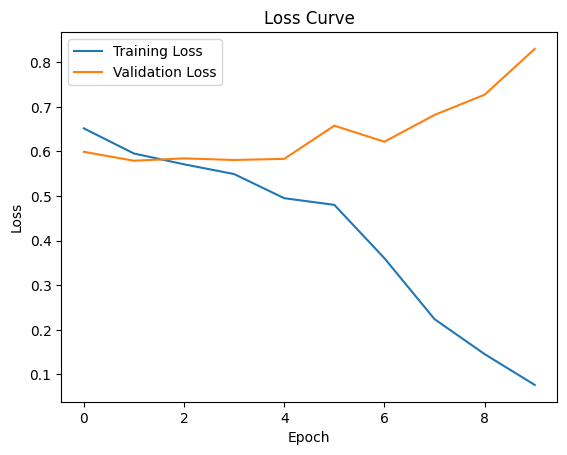

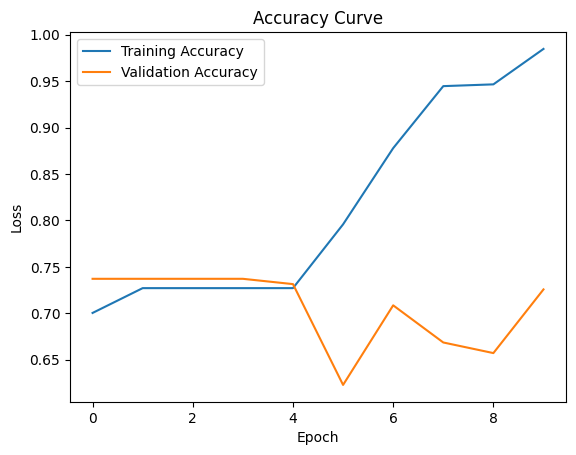

In [16]:
plot_loss(history)
plot_accuracy(history)

In [7]:
embedding_dim = 16
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      LSTM(100),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
17/17 [==============================] - 17s 471ms/step - loss: 0.6553 - accuracy: 0.7118 - val_loss: 0.5961 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 10s 571ms/step - loss: 0.5963 - accuracy: 0.7271 - val_loss: 0.5761 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 7s 433ms/step - loss: 0.5786 - accuracy: 0.7271 - val_loss: 0.5755 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 9s 515ms/step - loss: 0.5639 - accuracy: 0.7271 - val_loss: 0.5735 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 7s 434ms/step - loss: 0.5231 - accuracy: 0.7271 - val_loss: 0.5725 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 9s 519ms/step - loss: 0.4503 - accuracy: 0.8111 - val_loss: 0.5875 - val_accuracy: 0.7314
Epoch 7/10
17/17 [==============================] - 7s 424ms/step - loss: 0.2986 - accuracy: 0.8779 - val_loss: 0.6144 - val_accuracy: 0.6914
Epoc

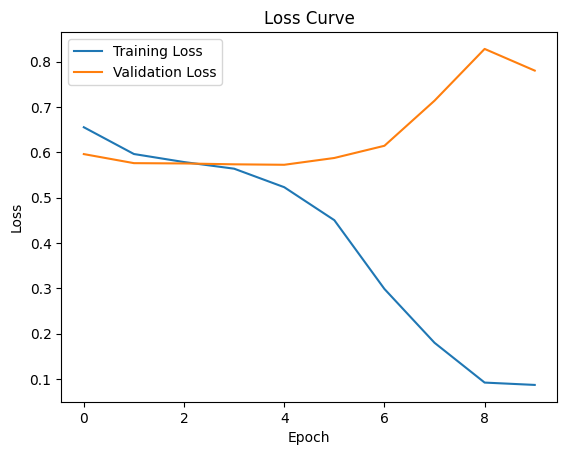

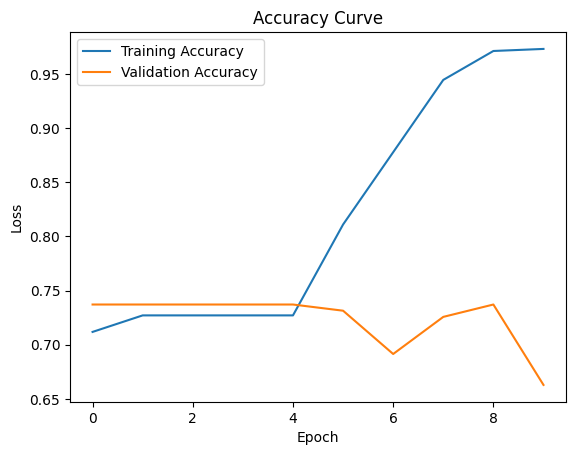

In [11]:
plot_loss(history)
plot_accuracy(history)

## Trying with a different NN without LSTM

### Dense Layers Only

In [7]:
def run_nn(X, y):
  X_list = X.iloc[:, 0].tolist() # get just the col of strings as list

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_list)
  total_words = len(tokenizer.word_index) + 1

  sequences = tokenizer.texts_to_sequences(X_list)
  padded_sequences = pad_sequences(sequences)

  x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)

  # Build the model
  embedding_dim = 16
  model = Sequential([
      Dense(units=64, activation='relu', input_shape=(np.shape(x_train)[1],)), # uh is the shape right lol? num cols
      Dense(units=32, activation='relu'),
      Dense(units=1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

  print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

  return history

In [8]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/all_x_text_per_speaker.csv')
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')

In [9]:
X_list = X.iloc[:, 0].tolist() # get just the col of strings as list

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_list)
total_words = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(X_list)
padded_sequences = pad_sequences(sequences)

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)


In [10]:
# Build the model
embedding_dim = 16
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(np.shape(x_train)[1],)), # uh is the shape right lol? num cols
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")


Epoch 1/10
17/17 [==============================] - 7s 18ms/step - loss: 257.8210 - accuracy: 0.7252 - val_loss: 145.4931 - val_accuracy: 0.6743
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 52.5405 - accuracy: 0.7958 - val_loss: 58.4315 - val_accuracy: 0.7143
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 14.8673 - accuracy: 0.9332 - val_loss: 58.8439 - val_accuracy: 0.7714
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 2.1887 - accuracy: 0.9676 - val_loss: 84.0997 - val_accuracy: 0.7943
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 1.0048 - accuracy: 0.9752 - val_loss: 98.5469 - val_accuracy: 0.6914
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 2.3873 - accuracy: 0.9790 - val_loss: 88.5305 - val_accuracy: 0.7829
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5604 - accuracy: 0.9924 - val_loss: 89.2175 - val_accuracy: 0.7771
Epoch 8

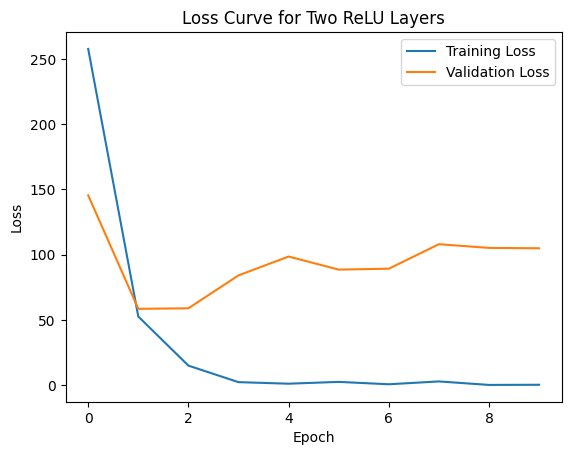

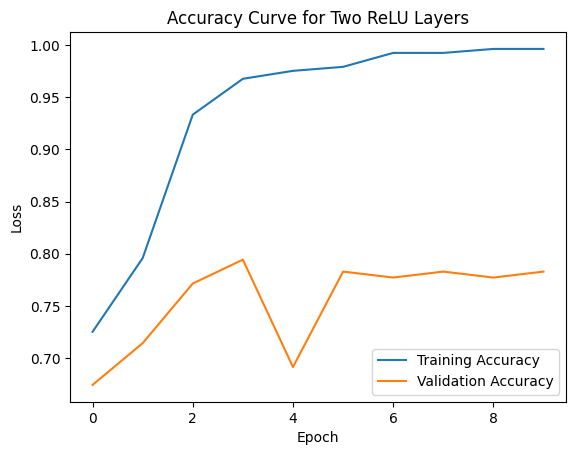

In [11]:
plot_loss(history)
plot_accuracy(history)

In [22]:
# Build the model
embedding_dim = 16
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(np.shape(x_train)[1],)), # uh is the shape right lol? num cols
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")


Epoch 1/10
17/17 [==============================] - 2s 18ms/step - loss: 222.7974 - accuracy: 0.6718 - val_loss: 126.3508 - val_accuracy: 0.7200
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 67.0757 - accuracy: 0.8206 - val_loss: 111.6891 - val_accuracy: 0.7429
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 47.1432 - accuracy: 0.8931 - val_loss: 111.3041 - val_accuracy: 0.7771
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 10.7447 - accuracy: 0.9542 - val_loss: 182.8788 - val_accuracy: 0.7486
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 6.2679 - accuracy: 0.9676 - val_loss: 197.4974 - val_accuracy: 0.7429
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 8.5965 - accuracy: 0.9523 - val_loss: 164.2396 - val_accuracy: 0.7886
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 5.4784 - accuracy: 0.9733 - val_loss: 226.6667 - val_accuracy: 0.8000


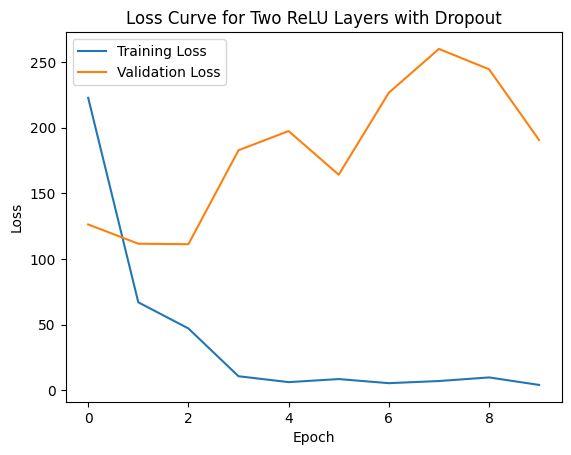

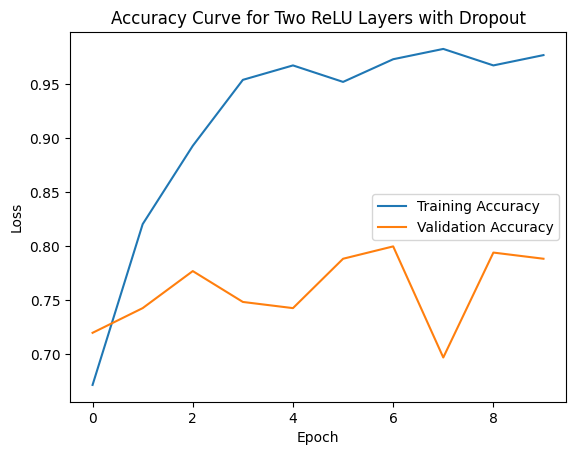

In [23]:
plot_loss(history, 'Two ReLU Layers with Dropout')
plot_accuracy(history, 'Two ReLU Layers with Dropout')

### Flattened Embedding Layer

In [35]:
# Build the model
embedding_dim = 16
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      Flatten(),
      Dense(units=64, activation='relu'),
      Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

Epoch 1/10
17/17 [==============================] - 4s 171ms/step - loss: 0.8532 - accuracy: 0.7233 - val_loss: 0.4835 - val_accuracy: 0.7943
Epoch 2/10
17/17 [==============================] - 3s 164ms/step - loss: 0.3961 - accuracy: 0.8397 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 3/10
17/17 [==============================] - 4s 256ms/step - loss: 0.3200 - accuracy: 0.8721 - val_loss: 0.4826 - val_accuracy: 0.7943
Epoch 4/10
17/17 [==============================] - 3s 179ms/step - loss: 0.2181 - accuracy: 0.9389 - val_loss: 0.4736 - val_accuracy: 0.7943
Epoch 5/10
17/17 [==============================] - 3s 180ms/step - loss: 0.1379 - accuracy: 0.9618 - val_loss: 0.4764 - val_accuracy: 0.7943
Epoch 6/10
17/17 [==============================] - 3s 208ms/step - loss: 0.0806 - accuracy: 0.9866 - val_loss: 0.4825 - val_accuracy: 0.8000
Epoch 7/10
17/17 [==============================] - 3s 157ms/step - loss: 0.0464 - accuracy: 0.9962 - val_loss: 0.4909 - val_accuracy: 0.7943
Epoch 

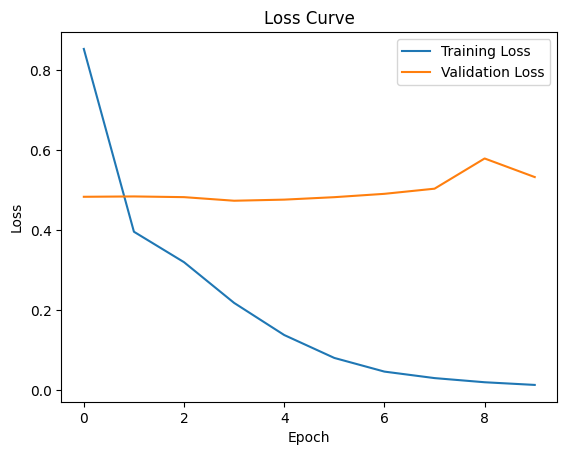

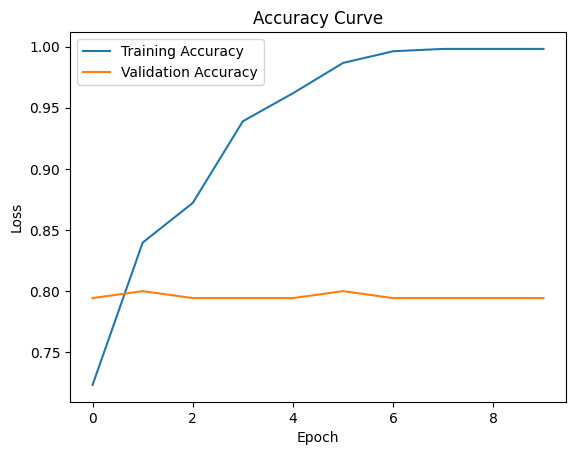

In [37]:
plot_loss(history)
plot_accuracy(history)

In [12]:
# Build the model
embedding_dim = 16
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      Flatten(),
      Dense(units=64, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

Epoch 1/10
17/17 [==============================] - 7s 206ms/step - loss: 1.0842 - accuracy: 0.7156 - val_loss: 0.5037 - val_accuracy: 0.7943
Epoch 2/10
17/17 [==============================] - 3s 172ms/step - loss: 0.4339 - accuracy: 0.8359 - val_loss: 0.4742 - val_accuracy: 0.8057
Epoch 3/10
17/17 [==============================] - 3s 174ms/step - loss: 0.3948 - accuracy: 0.8416 - val_loss: 0.4709 - val_accuracy: 0.7943
Epoch 4/10
17/17 [==============================] - 3s 194ms/step - loss: 0.2923 - accuracy: 0.8798 - val_loss: 0.4753 - val_accuracy: 0.7943
Epoch 5/10
17/17 [==============================] - 4s 246ms/step - loss: 0.2245 - accuracy: 0.9160 - val_loss: 0.4742 - val_accuracy: 0.8000
Epoch 6/10
17/17 [==============================] - 3s 160ms/step - loss: 0.1516 - accuracy: 0.9561 - val_loss: 0.4880 - val_accuracy: 0.8114
Epoch 7/10
17/17 [==============================] - 3s 168ms/step - loss: 0.1062 - accuracy: 0.9752 - val_loss: 0.5253 - val_accuracy: 0.7943
Epoch 

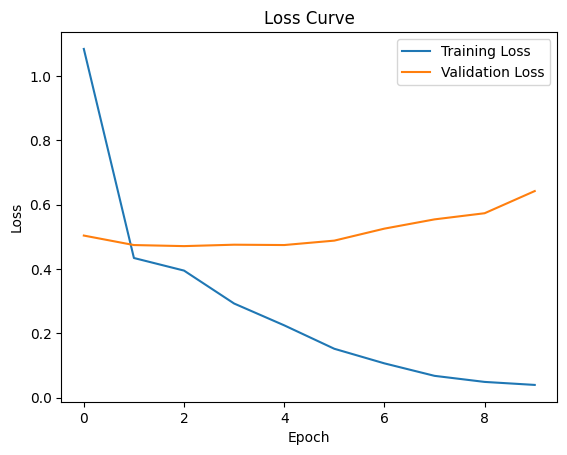

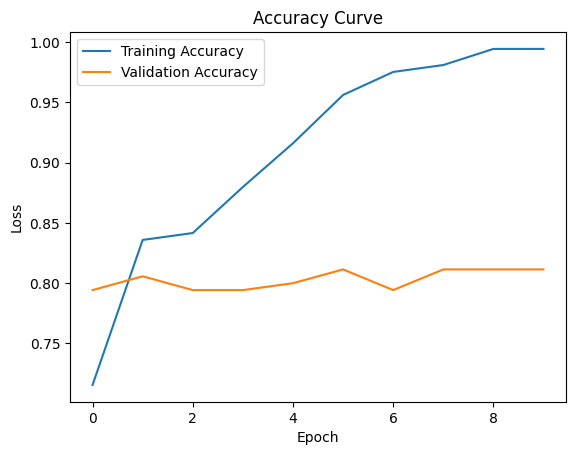

In [13]:
plot_loss(history)
plot_accuracy(history)

#### dense only, fewer hyperparams

In [14]:
# Build the model
embedding_dim = 16
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      Flatten(),
      Dense(units=32, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

Epoch 1/10
17/17 [==============================] - 5s 260ms/step - loss: 0.8214 - accuracy: 0.6851 - val_loss: 0.5124 - val_accuracy: 0.7943
Epoch 2/10
17/17 [==============================] - 4s 235ms/step - loss: 0.4805 - accuracy: 0.8111 - val_loss: 0.4677 - val_accuracy: 0.8000
Epoch 3/10
17/17 [==============================] - 3s 165ms/step - loss: 0.4317 - accuracy: 0.8340 - val_loss: 0.4915 - val_accuracy: 0.7943
Epoch 4/10
17/17 [==============================] - 2s 144ms/step - loss: 0.4016 - accuracy: 0.8511 - val_loss: 0.5160 - val_accuracy: 0.7886
Epoch 5/10
17/17 [==============================] - 3s 147ms/step - loss: 0.3526 - accuracy: 0.8645 - val_loss: 0.4800 - val_accuracy: 0.7943
Epoch 6/10
17/17 [==============================] - 3s 207ms/step - loss: 0.2898 - accuracy: 0.8989 - val_loss: 0.5045 - val_accuracy: 0.7886
Epoch 7/10
17/17 [==============================] - 4s 220ms/step - loss: 0.2831 - accuracy: 0.9008 - val_loss: 0.5365 - val_accuracy: 0.7829
Epoch 

In [15]:
# Build the model
embedding_dim = 8
model = Sequential([
      Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
      Flatten(),
      Dense(units=16, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test.values.ravel()))

print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

Epoch 1/10
17/17 [==============================] - 5s 258ms/step - loss: 0.5653 - accuracy: 0.7156 - val_loss: 0.4946 - val_accuracy: 0.7486
Epoch 2/10
17/17 [==============================] - 4s 213ms/step - loss: 0.4946 - accuracy: 0.7595 - val_loss: 0.4911 - val_accuracy: 0.8171
Epoch 3/10
17/17 [==============================] - 3s 165ms/step - loss: 0.4399 - accuracy: 0.8225 - val_loss: 0.5010 - val_accuracy: 0.7943
Epoch 4/10
17/17 [==============================] - 2s 124ms/step - loss: 0.3910 - accuracy: 0.8531 - val_loss: 0.5104 - val_accuracy: 0.8057
Epoch 5/10
17/17 [==============================] - 3s 163ms/step - loss: 0.3317 - accuracy: 0.8702 - val_loss: 0.4811 - val_accuracy: 0.7943
Epoch 6/10
17/17 [==============================] - 3s 210ms/step - loss: 0.2807 - accuracy: 0.8836 - val_loss: 0.4781 - val_accuracy: 0.7886
Epoch 7/10
17/17 [==============================] - 4s 231ms/step - loss: 0.2235 - accuracy: 0.9008 - val_loss: 0.4775 - val_accuracy: 0.8057
Epoch 